In [1]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest

from matplotlib import pyplot as plt
df=pd.read_csv('sample.csv',nrows=1000000)

In [13]:
stats, p = normaltest(df)

/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1086: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2
/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1090: RuntimeWarning: overflow encountered in square
  s = s**2
/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


In [14]:
p#does that no feature is gaussian-distributed?

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])

NameError: name 'statsmodels' is not defined

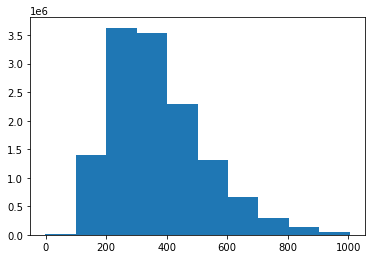

In [25]:
plt.hist(df['SPEFit2BayesianFitParams.nmini'])#just a random feature but it has somewhat of a bell-shape
statsmodels.graphics.gofplots.qqplot(df['SPEFit2BayesianFitParams.nmini'])

In [24]:
from scipy.stats import anderson #just another attempt to look at the data
for column in list(df):
    print(column)
    print(anderson(df[column], dist='norm'))
    print()

Unnamed: 0
AndersonResult(statistic=148292.56840872392, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Unnamed: 0.1
AndersonResult(statistic=148292.56840872392, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Unnamed: 0.1.1
AndersonResult(statistic=148304.7800737545, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

more_features.Type
AndersonResult(statistic=3968667.5314072147, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

more_features.confidence_1
AndersonResult(statistic=1984870.8802877832, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

more_features.Label_cut
AndersonResult(statistic=5143143.501843754, critical_values=array([0.576

In [4]:
#from sklearn.preprocessing import power_transform
#X=df.drop('MCPrimary.energy',axis=1)
#X_t=power_transform(X, method='yeo-johnson')
#stats, p = normaltest(df)
#p
df.values >= np.finfo(np.float64).max

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [5]:
df.isnull().values.any()

False

In [8]:

np.isfinite(df).all()

Unnamed: 0                     True
Unnamed: 0.1                   True
Unnamed: 0.1.1                 True
more_features.Type             True
more_features.confidence_1     True
                               ... 
SPEFit2_HVFitParams.nmini      True
LineFitGeoSplit2.zenith        True
Dustyness.n_doms_in_dust       True
VariousVariables.Cone_Angle    True
weight_honda_h4a               True
Length: 79, dtype: bool

In [2]:
from sklearn.preprocessing import power_transform
X=df.drop(['MCPrimary.energy'],axis=1)
X_t=power_transform(X, method='yeo-johnson')
stats, p = normaltest(X_t)
p

/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 6.22013140e-162, 0.00000000e+000, 0.00000000e+000,
       5.90450491e-192, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 9.64605514e-269, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0